# Assignment 5

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import scipy.integrate as spi

In [11]:
from scipy.misc import factorial
from scipy.misc import comb
from scipy.misc import derivative

## 1.

### (a)

$$
\int_0^{\infty} \frac{\arctan(px)\arctan(qx)}{x^2}dx = \frac{\pi}{2} \ln \left(\frac{(p+q)^{p+q}}{p^p q^q}\right) \ \ , \ \ p > 0 \ , \ q > 0
$$

### (b)

In [108]:
def pq_integral(p,q):
    if p <= 0 or q <= 0:
        print('Error: one of p or q is less than 0')
        return None
    else:
        def f(x):
            return (np.arctan(p*x)*np.arctan(q*x))/x**2
        I ,abserr = spi.quad(f,0,np.inf)
        return I

In [109]:
pq_integral(1,1)

2.177586090303602

In [110]:
def pq(p,q):
    return np.pi/2 * np.log((p+q)**(p+q)/(p**p * q**q))

In [111]:
pq(1,1)

2.1775860903036022

## 2. 

### (a)

$$
\int_0^{\infty} \frac{\ln x}{a^2 + b^2 x^2} dx= \frac{\pi}{2ab} \ln \left(\frac{a}{b}\right) \ \ , \ ab > 0
$$

### (b)

In [112]:
def ab_integral(a,b):
    if a*b < 0:
        print('Error: ab < 0')
        return None
    else:
        def f(x):
            return np.log(x)/(a**2+b**2 *x**2)
        I, abserr = spi.quad(f,0,np.inf)
        return I

In [113]:
ab_integral(10,1)

0.36168922062080777

In [114]:
def ab(a,b):
    return np.pi/(2*a*b) * np.log(a/b)

In [115]:
ab(10,1)

0.36168922062077324

## 3.

In [116]:
def derivatives(f,a,n,h=0.001):
    H = [ ]
    m = 1
    g = 0
    while m <= n:
        for k in range(0,m+1):
            g = g + ((-1)**k * comb(m,k) * f(a + (m-2*k)*h))
        gf = g * (1 / (2**m * h**m))
        H.append(gf)
        g = 0
        m += 1
    return np.array(H)

In [117]:
def f(x):
    return x**4
derivatives(f,1,4)

array([  4.000004  ,  12.000008  ,  24.00000013,  23.99997562])

In [ ]:
comb?

## 4.

In [40]:
def taylor(f,a,n,L):
    
    H = [ ]
    m = 1
    g = 0
    while m <= n:
        for k in range(0,m+1):
            g = g + ((-1)**k * comb(m,k) * f(a + (m-2*k)*0.001))
        gf = g * (1 / (2**m * 0.001**m))
        H.append(gf)
        g = 0
        m += 1
    #return np.array(H)
    T = 0
    for k in range(0,n+1):
        x = np.linspace(a-L,a+L,1000)
        T = T + ((H[n-1]/factorial(k)) * (x-a)**k)
                
    plt.plot(x,f(x),x,T),plt.xlim(a-L,a+L)

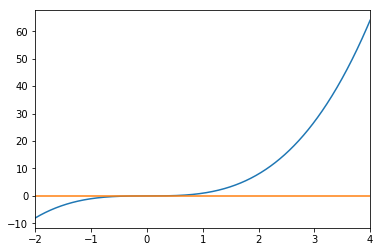

In [42]:
def f(x):
    return x**3
taylor(f,1,4,3)

In [43]:

    
def derivatives1(f,a,n,L,h=0.001):
    H = [ ]
    m = 1
    g = 0
    while m <= n:
        for k in range(0,m+1):
            g = g + ((-1)**k * comb(m,k) * f(a + (m-2*k)*h))
        gf = g * (1 / (2**m * h**m))
        H.append(gf)
        g = 0
        m += 1
    #return np.array(H)
   
    T = 0
    for k in range(0,n+1):
        x = np.linspace(a-L,a+L,1000)
        T = T + ((H[k-1]/factorial(k)) * (x-a)**k)
                
        #plt.plot(x,f(x))
        plt.plot(x,T,x,f(x),'r.')
        plt.show()

In [ ]:
def f(x):
    return np.cos(x)
derivatives1(f,np.pi,4,1)

In [ ]:
factorial(0)

## 5.

In [43]:
def newton(f,x0,tolerance,max_iter):
    xn = x0
    n = 0
    while n <= max_iter:
        if derivative(f,xn,dx=0.001) == 0:
            return None
        elif abs(f(xn)) < tolerance:
            return xn
        else:
            xn1 = xn - f(xn)/derivative(f,xn,dx=0.00001)
            xn = xn1
            n += 1
            if n > max_iter:
                return None

In [49]:
def f(x):
    return x**3-x+1
newton(f,-1,0.08,3)

-1.3252003989515206

In [5]:
def f(x):
    return x**3 - 5
newton(f,2,23,4)

2

In [8]:
newton(f,10,6,10)

1.8210174302544662